# **Linear Regression**

### **Session Outline**
1. Load the California Housing Dataset
2. Data Analysis and Preprocessing - data statistics, correlation matrix, feature scaling (normalization).
3. Split Data into Training, Validation, and Test Sets
4. Implement Linear Regression from Scratch Using Gradient Descent
5. Perform Linear Regression Using the Least Squares Method (Normal Equation)
6. Fit a Linear Regression Model Using Scikit-learn
7. Illustrate Overfitting and Underfitting


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from numpy.linalg import inv

In [2]:
# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target
X.shape

(20640, 8)

In [3]:
# Convert to DataFrame for easier analysis
df = pd.DataFrame(X, columns=data.feature_names)
df['Target'] = y

In [4]:
# Summary statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Target, dtype: float64


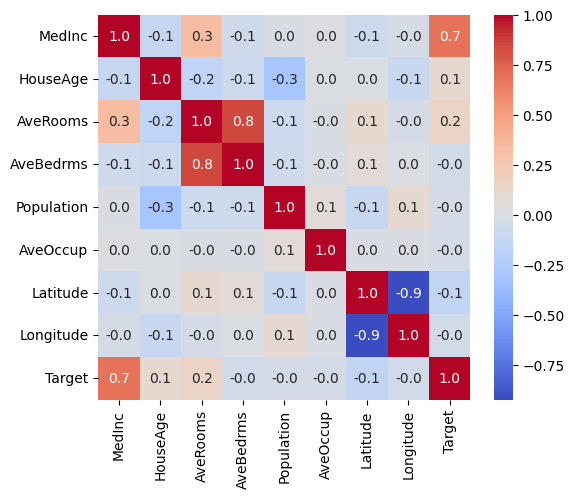

In [5]:
# Compute correlation matrix
corr_matrix = df.corr()
print(corr_matrix['Target'].sort_values(ascending=False))

# Plot correlation matrix
plt.figure(figsize=(6, 5))
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

Setting ```self.theta``` to ```None``` instead of ```0``` in a class initialization often indicates that the parameter theta has not yet been initialized or estimated.

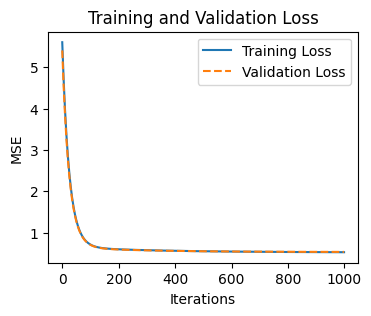

In [8]:
# Define Linear Regression with Gradient Descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None
        self.mse_history_train = []
        self.mse_history_val = []

    def fit(self, X_train, y_train, X_val, y_val):
        # Add intercept term to X
        X_train_b = self.add_intercept(X_train)
        X_val_b = self.add_intercept(X_val)
        m, n = X_train_b.shape
        self.theta = np.zeros(n)

        # Gradient Descent
        for _ in range(self.iterations):
            predictions_train = self.predict(X_train_b)
            errors_train = predictions_train - y_train
            gradients = (2 / m) * X_train_b.T.dot(errors_train)
            self.theta -= self.learning_rate * gradients

            # Compute and store MSE for training and validation sets
            mse_train = self.compute_mse(y_train, predictions_train)
            self.mse_history_train.append(mse_train)

            predictions_val = self.predict(X_val_b)
            mse_val = self.compute_mse(y_val, predictions_val)
            self.mse_history_val.append(mse_val)

    def predict(self, X):
        return X.dot(self.theta)

    def compute_mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def get_mse_history(self):
        return self.mse_history_train, self.mse_history_val

    def add_intercept(self, X):
        return np.c_[np.ones(X.shape[0]), X] # Prepends a column of ones to the array X, often used to add an intercept term to the feature matrix.

# Compute parameters using the normal equation
def normal_equation(X, y):
    X_b = np.c_[np.ones(X.shape[0]), X]  # Add intercept term
    return inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Create and fit the model
model = LinearRegressionGD(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train, X_val, y_val)

# Plot training and validation loss
plt.figure(figsize=(4, 3))
plt.plot(model.get_mse_history()[0], label='Training Loss')
plt.plot(model.get_mse_history()[1], label='Validation Loss', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [9]:
# Evaluate on the test set using gradient descent
X_test_b = model.add_intercept(X_test)
test_predictions = model.predict(X_test_b)
test_mse = model.compute_mse(y_test, test_predictions)
print(f'Test MSE (Gradient Descent): {test_mse}')

# Compute optimal parameters using normal equation
theta_normal = normal_equation(X_train, y_train)

# Evaluate on the test set using normal equation
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]  # Add intercept term to X_test
test_predictions_normal = X_test_bias.dot(theta_normal)
test_mse_normal = mean_squared_error(y_test, test_predictions_normal)
print(f'Test MSE (Normal Equation): {test_mse_normal}')

Test MSE (Gradient Descent): 0.5324084380556544
Test MSE (Normal Equation): 0.524456362872915


### **Linear Regression using scikit-learn package**

In [10]:
# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE with the Original Features: {mse:.4f}')

MSE with the Original Features: 0.5245


MSE with Subset of Features: 0.6493
Shape of X_train_poly (10320, 495)
MSE with Polynomial Features: 1.0924


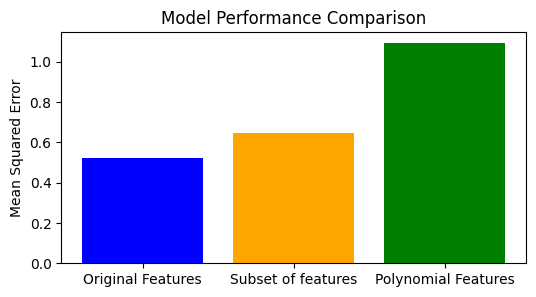

In [11]:
# Illustrate Underfitting (using a random subset of features)
np.random.seed(42)
feature_indices = np.random.choice(X_train.shape[1], 5, replace=False)# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
X_train_subset = X_train[:, feature_indices]
X_test_subset = X_test[:, feature_indices]
subset_model = LinearRegression()
subset_model.fit(X_train_subset, y_train)
y_pred_subset = subset_model.predict(X_test_subset)
mse_subset = mean_squared_error(y_test, y_pred_subset)
print(f'MSE with Subset of Features: {mse_subset:.4f}')

# Illustrate Overfitting (using polynomial features) - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
print("Shape of X_train_poly", X_train_poly.shape)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'MSE with Polynomial Features: {mse_poly:.4f}')

# Plotting the results
models = ['Original Features', 'Subset of features', 'Polynomial Features']
mse_values = [mse, mse_subset, mse_poly]

plt.figure(figsize=(6, 3))
plt.bar(models, mse_values, color=['blue', 'orange', 'green'])
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.show()

In [12]:
X_train.shape[1]

8

In [13]:
feature_indices

array([1, 5, 0, 7, 2])

## **Assignment - 2**

####  **Objective** - Classify emails as spam or not spam using the [Spambase](https://archive.ics.uci.edu/static/public/94/data.csv) dataset, which contains the frequency of occurrence of 57 entities (words and characters) (in %) from 4601 spam and non-spam emails and corresponding class labels.  

Spam Classification with Logistic Regression

<font color='blue'>Task 1: Load the Spambase Dataset</font> [Marks - 1]

- Load the Spambase dataset using Pandas.
- Display the first few rows to understand the structure of the data.

<font color='blue'>Task 2: Check for Duplicate Entries and Missing Values</font> [Marks - 1]

- Check if there are duplicate entries in the dataset.
- Remove any duplicate entries.
- Check for missing values in the dataset.
- Remove entries with missing feature values.

<font color='blue'>Task 3: Preprocess the Dataset</font> [Marks - 1]

- Preprocess the dataset as required:
- Perform feature scaling or standardization on the features.

<font color='blue'>Task 4: Check Dataset Balance</font> [Marks - 1]

- Determine if the dataset is balanced or imbalanced by analyzing the distribution of the target variable.

<font color='blue'>Task 5: Split the Data</font> [Marks - 1]

- Split the data into training, validation, and test sets with the following proportions:
  - Training set: 70%
  - Validation set: 15%
  - Test set: 15%



<font color='blue'>Task 6: Implement Logistic Regression from Scratch</font> [Marks - 8]

- Implement a logistic regression model from scratch using:
  - Cross-entropy loss as the cost function.
  - Gradient descent as the learning algorithm.
  - L1 regularization in the cost function.
- Train the logistic regression model using gradient descent.
- Choose appropriate values for the learning rate and regularization parameter through cross-validation.

<font color='blue'>Task 7: Evaluate Model Performance</font> [Marks - 2]

- Evaluate the performance of your logistic regression model on the test set using:
  - Confusion matrix.
  - Precision.
  - Recall.
  - Area under the Precision-Recall Curve (AUC-PR).


<font color='blue'>Task 8: Compare with Scikit-Learn</font> [Marks - 5]

- Fit a logistic regression model using scikit-learn.
- Compare the performance of your implementation with the scikit-learn model by evaluating:
  - Confusion matrix.
  - Precision.
  - Recall.
  - Area under the Precision-Recall Curve (AUC-PR).
- Compare the AUC-PR values between your implementation and scikit-learn's implementation.

In [14]:
# !pip install ucimlrepo

In [15]:
# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# spambase = fetch_ucirepo(id=94)

# # data (as pandas dataframes)
# X = spambase.data.features
# y = spambase.data.targets

# # metadata
# print(spambase.metadata)

# # variable information
# print(spambase.variables)

In [16]:
# df = pd.read_csv("https://archive.ics.uci.edu/static/public/94/data.csv")